In [13]:
import pandas as pd 
import numpy as np 
import sklearn 

In [15]:
df=pd.read_csv('/Users/vidhipatel/practice/churn_pred/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
df.rename(columns={'customerID':'Customer ID','gender':'Gender','SeniorCitizen':'Senior Citizen','tenure':'Tenure','PhoneService':'Phone Service','MultipleLines':'Multiple Lines','InternetService':'Internet Service','OnlineSecurity':'Online Security','OnlineBackup':'Online Backup','DeviceProctection':'Device Protection','TechSupport':'Tech Support','StreamingTV':'Streaming TV','StreamingMovies':'Streaming Movies','PaperlessBilling':'Paperless Billing','PaymentMethod':'Payment Method','MonthlyCharges':'Monthly Charges','TotalCharges':'Total Charges'},inplace=True)

In [21]:
df.columns


Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'DeviceProtection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [23]:
df.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
DeviceProtection     0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [25]:
#good as there are no missing values 

In [27]:
df.describe()

,Senior Citizen,Tenure,Monthly Charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [31]:
#From the dataset I believe that the Tenure has a large impact on predicting Churn 
#So we shall be exploring more to gain insights on Tenure 

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [35]:
df['Tenure'].value_counts()

Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: xlabel='Tenure', ylabel='Count'>

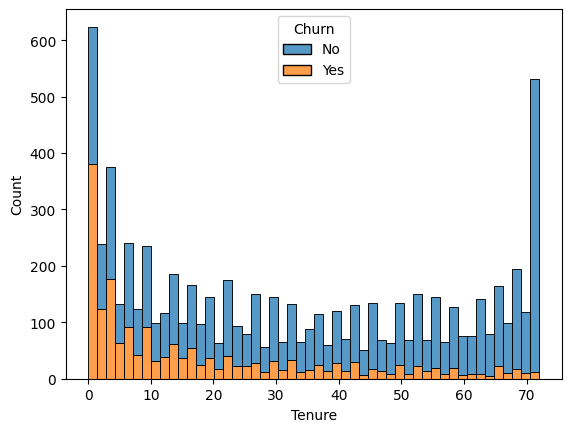

In [37]:
sns.histplot(data=df,x='Tenure',hue='Churn',multiple='stack',bins=50)


In [39]:
# From the visualisation above we can see that lower tenure has higher churn. 
# Loyal customers leave the company way lesser
# Customers who sustain for a longer time in the company do not Churn 

In [41]:
df.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
DeviceProtection      object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [43]:
#CustomerID is just for identification purpose so we do not need it for our correlation analysis 

In [45]:
df['Total Charges']=pd.to_numeric(df['Total Charges'],errors='coerce')

In [47]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

<Axes: xlabel='Contract', ylabel='Churn'>

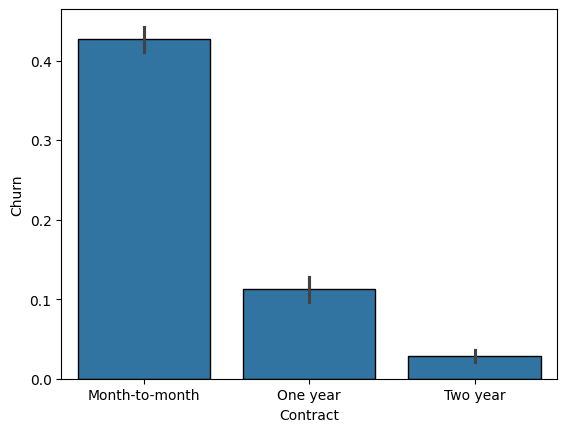

In [49]:
sns.barplot(x='Contract',y='Churn',data=df,edgecolor='black')

In [51]:
#From this we get the insight that monthly based subscriptions have higher churns.

<Axes: xlabel='Churn', ylabel='Tenure'>

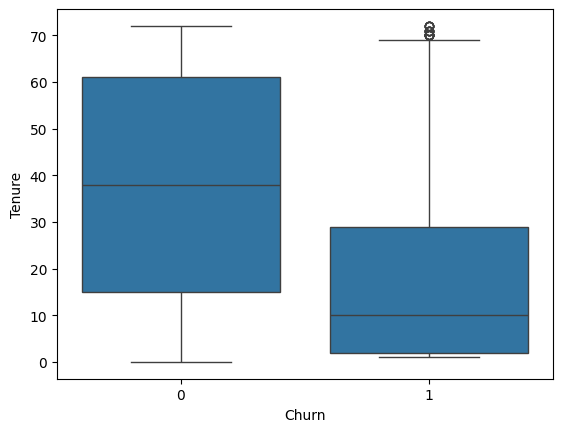

In [53]:
sns.boxplot(x='Churn',y='Tenure',data=df)

In [55]:
# Retained Customers stay for atleast 3+ years.
# Customers who typically churned left after around 10 months.
# There are outliers too for the churned customers.

In [57]:
# The critical period around first year where more and more customers are prone to churn

In [59]:
# which shows that the stakeholders should focus on improving onboarding, offer loyalty programs
# within the first 12 months to engage the customers 

In [61]:
# Now the questions arises. Why? do churners have higher monthly prices?
# Are they more likey to be on a monthly contract?
# does the payment method matter

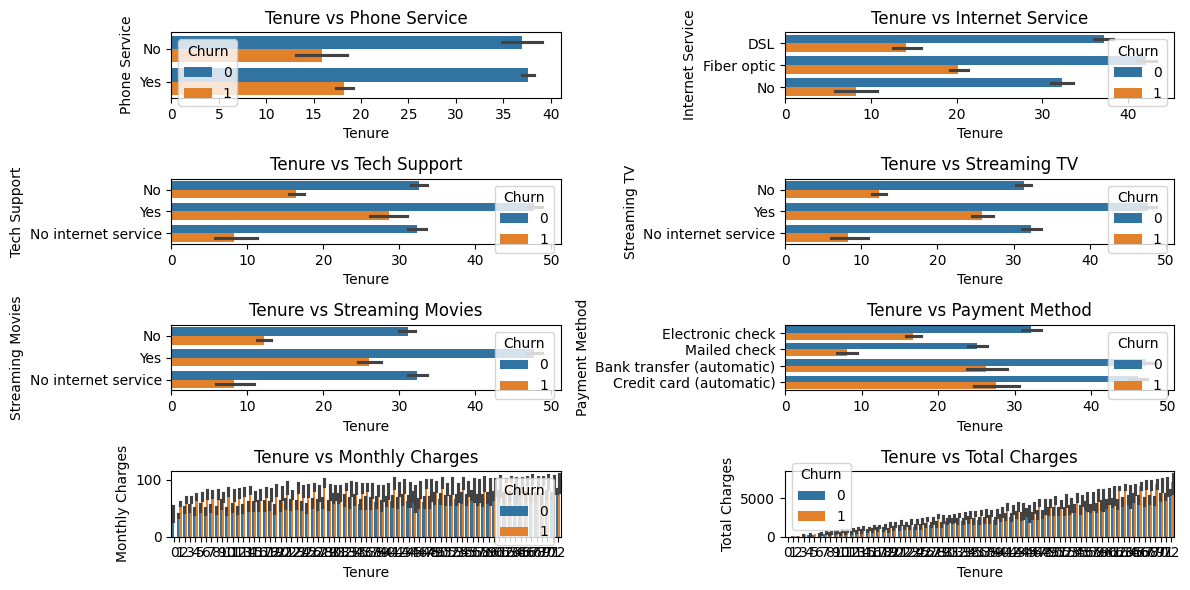

In [63]:
# Does tenure matter differently with or  without the tech support?
services=['Phone Service','Internet Service','Tech Support','Streaming TV','Streaming Movies','Payment Method','Monthly Charges','Total Charges']
fig,axes=plt.subplots(4,2,figsize=(12,6))
axes=axes.flatten()
for i,service in enumerate(services):
    sns.barplot(data=df,x='Tenure',y=service,hue='Churn',ax=axes[i])
    axes[i].set_title(f"Tenure vs {service}")
plt.tight_layout()
plt.show()
    

In [65]:
# churn happens relatively slower when we offer services like streaming Movies, TV and Tech Support 

In [67]:
# lets plot to see what % of people are leaving 


([<matplotlib.patches.Wedge at 0x11ac0b020>,
 [Text(-0.8144538274874914, -0.7393679482442931, '0'),
  Text(0.8144539391289364, 0.7393678252651782, '1')],
 [Text(-0.4442475422659044, -0.4032916081332507, '73.5%'),
  Text(0.44424760316123796, 0.4032915410537335, '26.5%')])

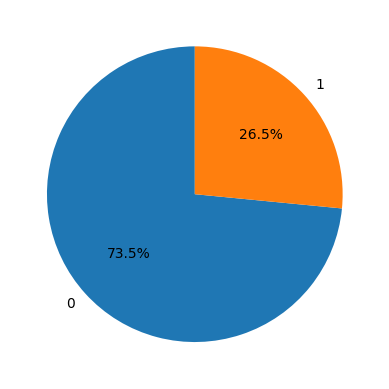

In [69]:
churn_value_counts=df['Churn'].value_counts()
plt.pie(churn_value_counts,labels=churn_value_counts.index,autopct='%1.1f%%',startangle=90)

In [79]:
df_encoded=pd.get_dummies(df)
df_encoded = df_encoded.fillna(0) 

In [81]:
df_encoded = df_encoded.replace([np.inf, -np.inf], 0)

In [83]:
df_encoded = df_encoded.astype(int)

In [85]:
df_encoded.dtypes

Senior Citizen                              int64
Tenure                                      int64
Monthly Charges                             int64
Total Charges                               int64
Churn                                       int64
                                            ...  
Paperless Billing_Yes                       int64
Payment Method_Bank transfer (automatic)    int64
Payment Method_Credit card (automatic)      int64
Payment Method_Electronic check             int64
Payment Method_Mailed check                 int64
Length: 7089, dtype: object

In [87]:
df["Total Charges"] = df["Total Charges"].fillna(0)

In [89]:
# lets see what features affect the churn the most 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_encoded=pd.get_dummies(df,drop_first=True)
X=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [94]:
log_reg = LogisticRegression(max_iter=500, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [95]:
importance = pd.Series(log_reg.coef_[0], index=X.columns)

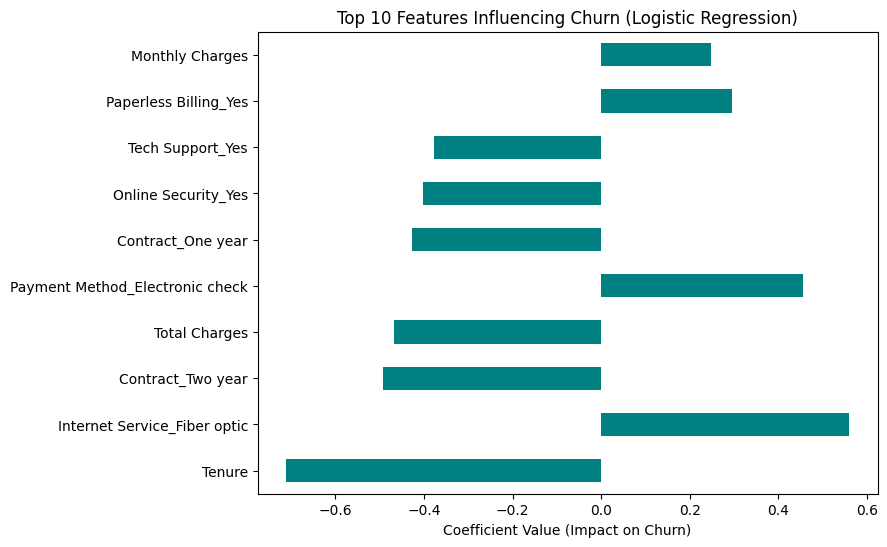

In [99]:
plt.figure(figsize=(8,6))
importance.sort_values(key=abs, ascending=False).head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Features Influencing Churn (Logistic Regression)")
plt.xlabel("Coefficient Value (Impact on Churn)")
plt.show()

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf=RandomForestClassifier(n_estimators=200,random_state=42,class_weight="balanced")

In [105]:
model=rf.fit(X_train,y_train)

In [106]:
importance=pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

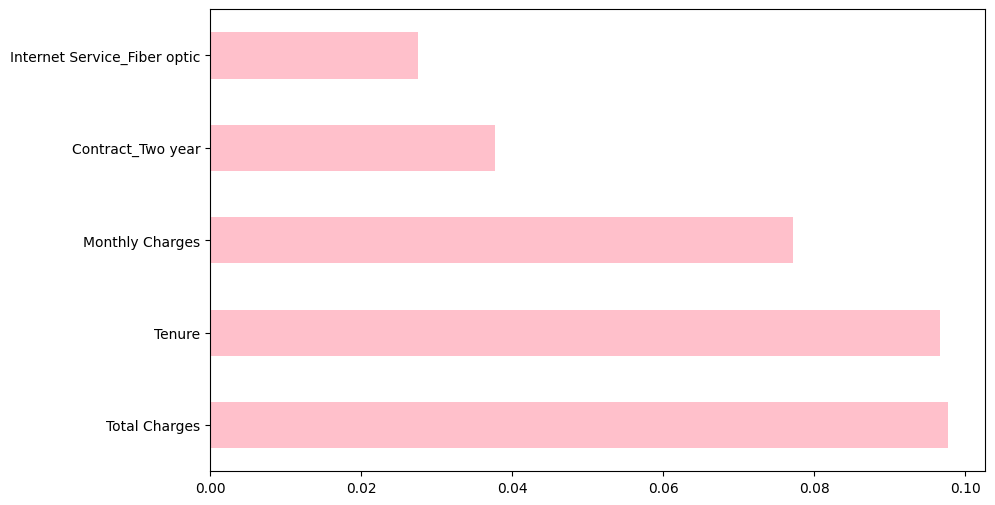

In [109]:
plt.figure(figsize=(10,6))
importance.sort_values(ascending=False).head(5).plot(kind='barh', color='pink')


In [111]:
# Top 5 factors influencing Churn consists of 
# a.) Total Charges
# b.) Tenure 
# c.) Monthly Charges
# d.) Fiber Optic Internet Service
# e.) Payment Method- Electronic Check


In [113]:
# So now as a company we make decisions while keeping in mind these features so we can provide better business outcomes

In [115]:
# What if we give free tech support to the new customers for the first 6 months? 
# will that help in retaining more and more customers

In [117]:
y_pred=model.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy: ',accuracy_score(y_pred,y_test))          

Accuracy:  0.8055358410220014


In [121]:
print('Classification Report: ', classification_report(y_pred,y_test))

Classification Report:                precision    recall  f1-score   support

           0       0.92      0.84      0.87      1136
           1       0.50      0.68      0.58       273

    accuracy                           0.81      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.84      0.81      0.82      1409



In [123]:
# we arent happy with the reuslts we got so far so we shall try boosted models to improve the precision and recall


In [125]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [155]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
xgb = XGBClassifier(
    n_estimators=20,      
    learning_rate=0.05,     
    max_depth=2,             
    subsample=0.8,         
    colsample_bytree=0.8,    
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))


/Users/vidhipatel/practice/prac_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:16:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1035
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.72      0.74      1409



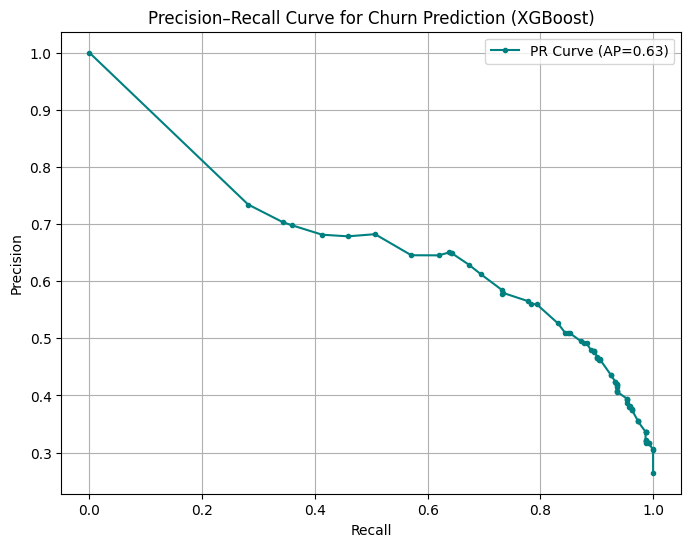

In [129]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_probs_xgb = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_xgb)

avg_precision = average_precision_score(y_test, y_probs_xgb)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color="teal", label=f"PR Curve (AP={avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve for Churn Prediction (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()


In [131]:
# Here’s the Precision–Recall curve for my churn model. It shows that there’s a natural trade-off: 
# if I want very high recall (catch most churners), precision drops. 
# At a threshold of 0.35, I get 91% recall meaning we catch nearly every churner but precision is only 43%.
# If the business wanted higher precision, say 70%, we’d need to accept recall closer to 50%.

In [133]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ----------------------------
# 1. Setup
# ----------------------------

TARGET = "Churn"

# Exclude non-actionable features like Total Charges
non_actionable = ["Total Charges"]
cols = [c for c in df_encoded.columns if c != TARGET and c not in non_actionable]

X = df_encoded[cols].copy()
y = df_encoded[TARGET].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    scale_pos_weight=pos_weight,
    eval_metric="logloss",
    n_jobs=-1
)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Baseline report (actionable model):")
print(classification_report(y_test, y_pred, digits=3))

# Baseline churn probabilities
probs_base = xgb.predict_proba(X_test)[:, 1]

# Define at-risk customers
thresh = 0.5
at_risk_mask = probs_base >= thresh
print(f"\nTest rows: {len(X_test)}, at-risk rows (p>={thresh}): {at_risk_mask.sum()}")

# Utility to check intervention effect
def report_effect(name, probs_before, probs_after, threshold=0.5):
    pred_before = (probs_before >= threshold).astype(int)
    pred_after  = (probs_after  >= threshold).astype(int)
    flips = np.sum((pred_before == 1) & (pred_after == 0))
    print(f"\n{name}")
    print(f"  Avg churn risk (at-risk cohort)  BEFORE: {probs_before[at_risk_mask].mean():.4f}")
    print(f"  Avg churn risk (at-risk cohort)  AFTER : {probs_after[at_risk_mask].mean():.4f}")
    print(f"  Δ risk (at-risk cohort)               : {(probs_before[at_risk_mask].mean() - probs_after[at_risk_mask].mean()):.4f}")
    print(f"  Flips 1→0 at threshold {threshold}    : {flips} of {pred_before.sum()} at-risk")

# ----------------------------
# 2. Interventions
# ----------------------------

# A) Monthly Charges discount (20%) for at-risk
X_disc = X_test.copy()
if "Monthly Charges" in X_disc.columns:
    X_disc.loc[at_risk_mask, "Monthly Charges"] *= 0.80
X_disc = X_disc.apply(pd.to_numeric, errors="ignore")
probs_disc = xgb.predict_proba(X_disc)[:, 1]
report_effect("Intervention A: 20% Monthly Charge discount", probs_base, probs_disc, threshold=thresh)

# B) Switch EC -> Auto-pay CC for at-risk
X_pay = X_test.copy()
ec_col = "Payment Method_Electronic check"
cc_col = "Payment Method_Credit card (automatic)"
if ec_col in X_pay.columns and cc_col in X_pay.columns:
    mask = at_risk_mask & (X_pay[ec_col] == 1)
    X_pay.loc[mask, ec_col] = 0
    X_pay.loc[mask, cc_col] = 1
X_pay = X_pay.apply(pd.to_numeric, errors="ignore")
probs_pay = xgb.predict_proba(X_pay)[:, 1]
report_effect("Intervention B: Move EC -> Auto-pay CC", probs_base, probs_pay, threshold=thresh)

# C) Add Tech Support for at-risk
X_ts = X_test.copy()
ts_yes = "Tech Support_Yes"
ts_noinet = "Tech Support_No internet service"
for col in [ts_yes, ts_noinet]:
    if col not in X_ts.columns:
        X_ts[col] = 0
mask = at_risk_mask
X_ts.loc[mask, ts_yes] = 1
if ts_noinet in X_ts.columns:
    X_ts.loc[mask, ts_noinet] = 0
X_ts = X_ts.apply(pd.to_numeric, errors="ignore")
probs_ts = xgb.predict_proba(X_ts)[:, 1]
report_effect("Intervention C: Add Tech Support", probs_base, probs_ts, threshold=thresh)

# D) Bundle: discount + auto-pay + tech support + 1-year contract
X_bundle = X_test.copy()

# Discount
if "Monthly Charges" in X_bundle.columns:
    X_bundle.loc[at_risk_mask, "Monthly Charges"] *= 0.80

# Payment change
if ec_col in X_bundle.columns and cc_col in X_bundle.columns:
    mask_ec = at_risk_mask & (X_bundle[ec_col] == 1)
    X_bundle.loc[mask_ec, ec_col] = 0
    X_bundle.loc[mask_ec, cc_col] = 1

# Tech Support
for col in [ts_yes, ts_noinet]:
    if col not in X_bundle.columns:
        X_bundle[col] = 0
X_bundle.loc[at_risk_mask, ts_yes] = 1
if ts_noinet in X_bundle.columns:
    X_bundle.loc[at_risk_mask, ts_noinet] = 0

# Contract: Month-to-Month -> One Year
c1, c2 = "Contract_One year", "Contract_Two year"
for col in [c1, c2]:
    if col not in X_bundle.columns:
        X_bundle[col] = 0
mm_mask = at_risk_mask & (X_bundle[c1] == 0) & (X_bundle[c2] == 0)
X_bundle.loc[mm_mask, c1] = 1
X_bundle.loc[mm_mask, c2] = 0

# Force numeric
X_bundle = X_bundle.apply(pd.to_numeric, errors="ignore")

probs_bundle = xgb.predict_proba(X_bundle)[:, 1]
report_effect("Intervention D: BUNDLE (discount+auto-pay+tech support+1yr contract)", probs_base, probs_bundle, threshold=thresh)



Baseline report (actionable model):
              precision    recall  f1-score   support

           0      0.888     0.778     0.829      1035
           1      0.542     0.727     0.621       374

    accuracy                          0.764      1409
   macro avg      0.715     0.753     0.725      1409
weighted avg      0.796     0.764     0.774      1409


Test rows: 1409, at-risk rows (p>=0.5): 502


/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:71: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_disc = X_disc.apply(pd.to_numeric, errors="ignore")



Intervention A: 20% Monthly Charge discount
  Avg churn risk (at-risk cohort)  BEFORE: 0.7541
  Avg churn risk (at-risk cohort)  AFTER : 0.6602
  Δ risk (at-risk cohort)               : 0.0940
  Flips 1→0 at threshold 0.5    : 91 of 502 at-risk


/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_pay.loc[mask, ec_col] = 0
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_pay.loc[mask, cc_col] = 1
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:83: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_pay = X_pay.apply(pd.to_numeric, errors="ignore")



Intervention B: Move EC -> Auto-pay CC
  Avg churn risk (at-risk cohort)  BEFORE: 0.7541
  Avg churn risk (at-risk cohort)  AFTER : 0.6935
  Δ risk (at-risk cohort)               : 0.0607
  Flips 1→0 at threshold 0.5    : 58 of 502 at-risk


/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_ts.loc[mask, ts_yes] = 1
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:97: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_ts.loc[mask, ts_noinet] = 0
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_ts = X_ts.apply(pd.to_numeric, errors="ignore")



Intervention C: Add Tech Support
  Avg churn risk (at-risk cohort)  BEFORE: 0.7541
  Avg churn risk (at-risk cohort)  AFTER : 0.6637
  Δ risk (at-risk cohort)               : 0.0904
  Flips 1→0 at threshold 0.5    : 87 of 502 at-risk


/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:112: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_bundle.loc[mask_ec, ec_col] = 0
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_bundle.loc[mask_ec, cc_col] = 1
/var/folders/fh/zjxd8g816y5cpxs5vpw1jjpw0000gn/T/ipykernel_22667/570643346.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_bundle.loc[at_risk_ma


Intervention D: BUNDLE (discount+auto-pay+tech support+1yr contract)
  Avg churn risk (at-risk cohort)  BEFORE: 0.7541
  Avg churn risk (at-risk cohort)  AFTER : 0.2358
  Δ risk (at-risk cohort)               : 0.5184
  Flips 1→0 at threshold 0.5    : 465 of 502 at-risk


In [385]:
#The model simulation shows that addressing churn drivers individually (price, payment method, support) each reduces risk modestly (5–9% on average, saving 50–100 customers).
# However, when combined into a bundled retention offer, the impact is transformative: average churn risk for at-risk customers falls by over 50%, and 91% of them flip to stay.

In [1]:
# lets do a cost benefit analysis
# lets actually calculate how much money is it helping the company save?


In [3]:
#Let’s assume:
#Average Customer Lifetime Value (CLV) = $500
#At-risk customers = 513
#Bundle strategy saves 468 customers
#Impact = 468 × $500 = $234,000 saved

In [5]:
#Discount = $10/month × 6 months × 468 customers = $28,080 cost
#Tech Support cost = assume $5/month × 6 months × 468 = $14,040 cost
#Net = $234,000 – ($28,080 + $14,040) ≈ $192,000 net savings

In [7]:
pip install shap 

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.6/556.6 kB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.2 MB/s eta 0:00:0000:0100:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 MB 21.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import shap 

/Users/vidhipatel/practice/prac_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [137]:
explainer=shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_test)

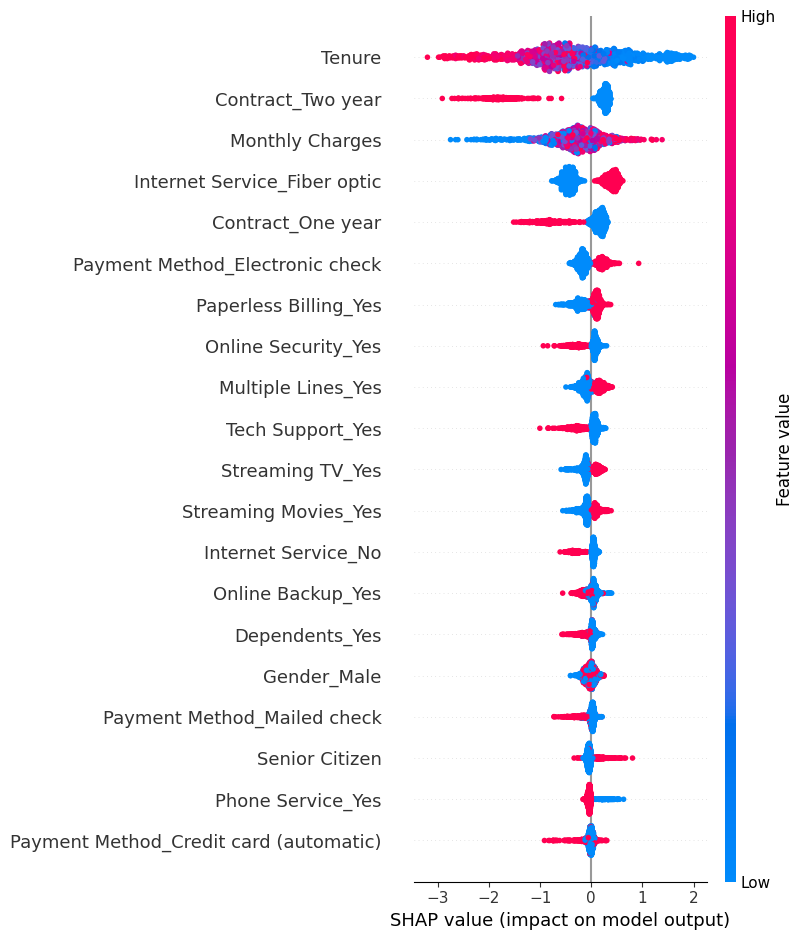

In [139]:
# Global feature importance
shap.summary_plot(shap_values, X_test)

# Individual customer explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [141]:
# plotting ROC and PR curves


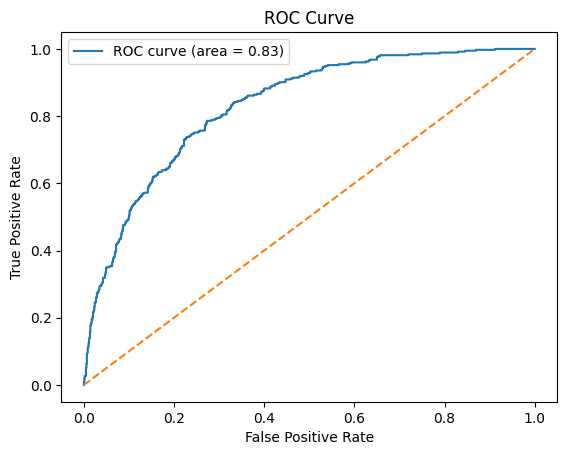

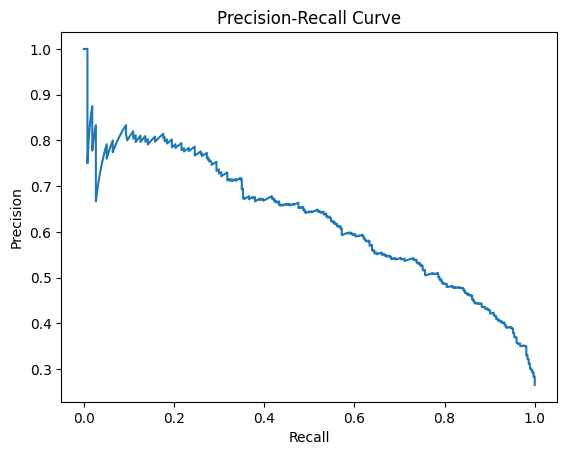

In [143]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs_base)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, probs_base)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


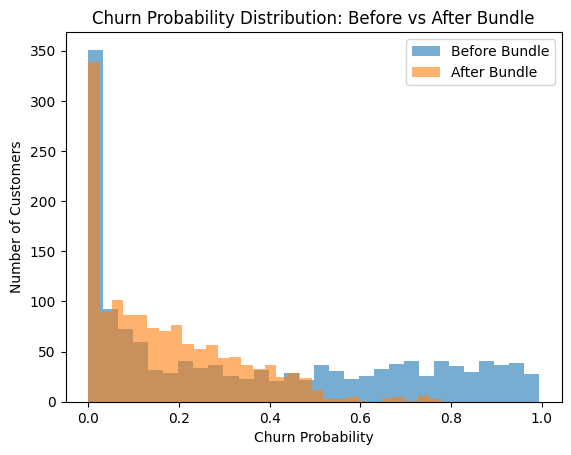

In [145]:
plt.hist(probs_base, bins=30, alpha=0.6, label='Before Bundle')
plt.hist(probs_bundle, bins=30, alpha=0.6, label='After Bundle')
plt.legend()
plt.title("Churn Probability Distribution: Before vs After Bundle")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.show()


In [147]:
# this graph shows how the probability shift after 